# Understanding Descriptive Statistics

Import the necessary libraries here:

In [55]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [35]:
# your code here

def roll_dice(x):
    roll = np.random.randint(1,7, size = x)
    df = pd.DataFrame(roll, columns=['roll'])
    return df

df = roll_dice(10)

#### 2.- Plot the results sorted by value.

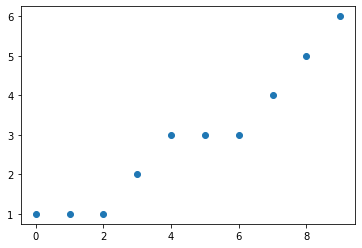

In [61]:
# your code here
df = df.sort_values(by=['roll']).reset_index(drop=True)

plt.scatter(df.index, df['roll'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

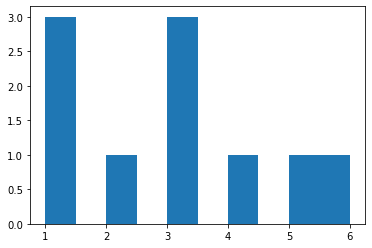

In [56]:
# your code here
count = df['roll'].value_counts()
plt.hist(df['roll'])
plt.show()

In [ ]:
"""
The scatter plot show every occurence of values.
On counterpart, the histogram show the frequency that each value appears.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [63]:
# your code here
def mean_rolls(x):
    sum_rolls = x.sum()
    times_rolls = len(x)
    mean_roll = sum_rolls / times_rolls
    return mean_roll

mean_rolls(df['roll'])

2.9

In [64]:
df['roll'].mean()

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [94]:
# your code here

def frequency(x):

    freq = {}
    for item in x:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

frequency(df['roll'])

{1: 3, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1}

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [176]:
# your code here

def median(list):
    mylist = [x for x in list]
    middle = int(len(mylist)/2)
    
    if len(mylist) % 2 == 0:
        median = (mylist[int(middle)] + mylist[int(middle -1)]) / 2
        
    else:
        median = mylist[middle]
        
    return median

median(df['roll'])

3.0

In [102]:
np.median(df['roll'])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [182]:
df['roll']

0    1
1    1
2    1
3    2
4    3
5    3
6    3
7    4
8    5
9    6
Name: roll, dtype: int32

In [185]:
# your code here

def quartiles(x):
    position = len(x)
    
    if position % 2 == 0:
        q1 = (x[int((position * 0.25) + 1)] + x[int((position * 0.25) - 1)])/2
        q2 = median(x)
        q3 = (x[int((position * 0.75) + 1)] + x[int((position * 0.75) - 1)])/2
    
    else:
        q1 = x[int(position * 0.25)]
        q2 = median(x)
        q3 = x[int(position * 0.75)]
    
    return print(f'q1 = {q1}, q2 = {q2}, q3 = {q3}')
                 
quartiles(df['roll'])

q1 = 1.5, q2 = 3.0, q3 = 4.0


In [149]:
df['roll'].quantile([0.25,0.5,0.75])

0.25    1.25
0.50    3.00
0.75    3.75
Name: roll, dtype: float64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

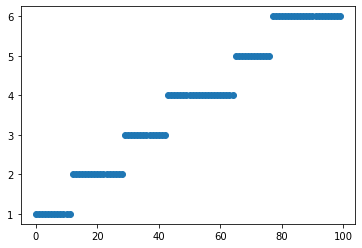

In [167]:
# your code here
data2 = pd.read_csv('C:\\Users\\msart\\Desktop\\IronHack\\Module_2\\lab-understanding-descriptive-stats\\data\\roll_the_dice_hundred.csv')

df2 = pd.DataFrame(data2)
df2 = df2.sort_values(by=['value'])

plt.scatter(df2.index, df2['value'])
plt.show()

In [ ]:
"""
It is possible to see a stair-like diagram.
This plot show, in a sorted way, how many times (the length of each line) each dice-side appears
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [168]:
# your code here
mean_rolls(df2['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [169]:
# your code here
frequency(df2['value'])

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

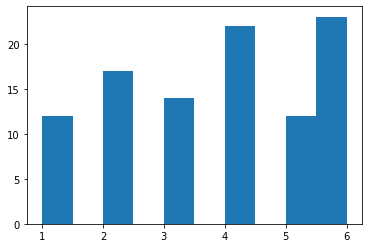

In [170]:
# your code here

plt.hist(df2['value'])
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

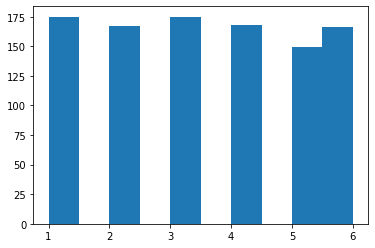

In [171]:
# your code here
data3 = pd.read_csv('C:\\Users\\msart\\Desktop\\IronHack\\Module_2\\lab-understanding-descriptive-stats\\data\\roll_the_dice_thousand.csv')
df3 = pd.DataFrame(data3)

df3 = df3.sort_values(by=['value']).reset_index(drop=True)

plt.hist(df3['value'])
plt.show()

In [ ]:
"""
as more rools we have, the more "normalized" distributed will be the values
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:ylabel='Frequency'>

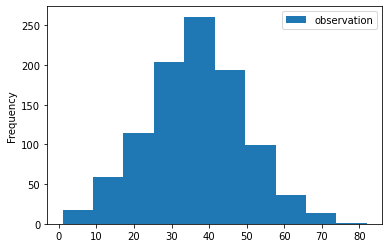

In [190]:
# your code here
data4 = pd.read_csv('C:\\Users\\msart\\Desktop\\IronHack\\Module_2\\lab-understanding-descriptive-stats\\data\\ages_population.csv')

df4.plot.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [174]:
# your code here
print(df4['observation'].mean())
print(df4['observation'].std())

36.56
12.816499625976757


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

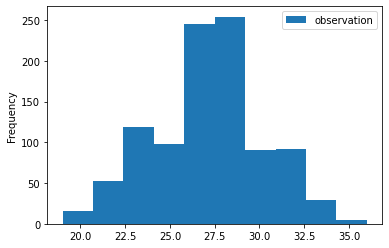

In [191]:
# your code here
data5 = pd.read_csv('C:\\Users\\msart\\Desktop\\IronHack\\Module_2\\lab-understanding-descriptive-stats\\data\\ages_population2.csv')

df5.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
As we low our bservations, we loose normalization in our frequency
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [192]:
# your code here
print(df5['observation'].mean())
print(df5['observation'].std())

27.155
2.9698139326891844


In [ ]:
"""
The mean and the std are lower.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

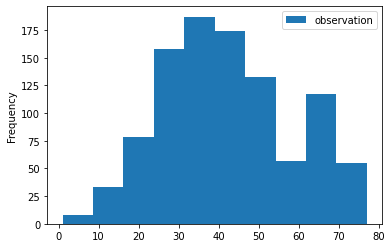

In [193]:
# your code here
data6 = pd.read_csv('C:\\Users\\msart\\Desktop\\IronHack\\Module_2\\lab-understanding-descriptive-stats\\data\\ages_population3.csv')

data6.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [194]:
# your code here
print(data6['observation'].mean())
print(data6['observation'].std())

41.989
16.144705959865934


In [ ]:
"""
The mean and the std are higher.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [195]:
# your code here
data6['observation'].quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [ ]:
"""
the difference is small (1.989), but the mean soen't take into consideration the frequency each value shows
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [196]:
# your code here
data6['observation'].quantile([0,0.25,0.5,0.75,1])

0.00     1.0
0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64

In [ ]:
"""
with this we can also have te lower and the highter observation
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

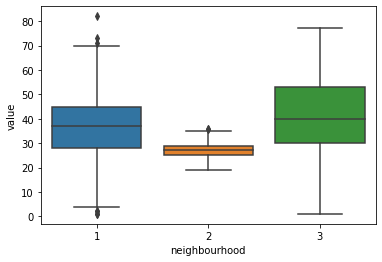

In [212]:
import seaborn as sns

data1 = df4.assign(neighbourhood=1)
data2 = data5.assign(neighbourhood=2)
data3 = data6.assign(neighbourhood=3)

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['neighbourhood'], var_name=['observation'])

ax = sns.boxplot(x="neighbourhood", y="value", data=mdf)    
plt.show()

In [ ]:
"""
With the bowplots we can now compare the basic statistics values
"""